# Variance illustrations

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.linalg as la
import seaborn as sns 
sns.set_theme();

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "font.sans-serif": ["Times"]})

Model
$$
y_{i t}=\mathbf{x}_{i t} \boldsymbol{\beta}+c_i+u_{i t}, \quad c_i \sim \operatorname{IID}\left(0, \sigma_c^2\right), u_{i t} \sim \operatorname{IID}\left(0, \sigma_u^2\right) .
$$

Let's try to illustrate the covariance matrix of the random effects model: 
$$
\begin{align}
\boldsymbol{\Omega}\equiv\text{E}(\mathbf{u}_{i}\mathbf{u}_{i}'|\mathbf{x}_{i})=\begin{pmatrix}\sigma_{c}^{2}+\sigma_{u}^{2} & \cdots & \sigma_{c}^{2}\\
\vdots & \ddots & \vdots\\
\sigma_{c}^{2} & \cdots & \sigma_{c}^{2}+\sigma_{u}^{2}
\end{pmatrix}=\sigma_{c}^{2}\mathbf{1}_{T}\mathbf{1}_{T}'+\sigma_{u}^{2}\mathbf{I}_{T\times T}
\end{align}
$$

The covariance is
$$
\operatorname{Cov}\left(v_{i t}, v_{j s} \mid \mathbf{X}\right)= 
\begin{cases}0  & \text { if } i \neq j \text { by independence over } i \\ 
                \sigma_c^2 & \text { if } i=j \text { and } t \neq s \\ 
                \sigma_c^2+\sigma_u^2 & \text { if } i=j \text { and } t=s
\end{cases}
$$

Where $v_i := c_i + u_{it} $

In [3]:
N = 10
T = 10

sigma_c = 2.0
sigma_u = 1.0
K = 3 
beta = np.array([[1.,1.,1.]]).T # row vector 

In [4]:
s = f'({sigma_c:3.1f},{sigma_u:3.1f})'
s

'(2.0,1.0)'

In [18]:
ticks   = [T/2 + i*T for i in range (N)]
ticklab = [f'{i+1}' for i in range(N)]

In [19]:
ticks

[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0]

In [20]:
ticklab

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [40]:
euu = np.eye(T)
def plot_omega(sigma_c, sigma_u, annotation=None, savename=None, title=None, cbar=True, euu=euu):
    '''
        Ex savename='theoretical_cov_re.pdf'
    '''
    omega = sigma_c * np.ones((T,T)) + sigma_u * euu # np.eye(T)

    ax = sns.heatmap(la.block_diag(*[omega for i in range(N)]), cmap = 'YlGnBu', cbar=cbar);
    ticks   = [T/2 + i*T for i in range (N)]
    ticklab = [f'{i+1}' for i in range(N)]
    ax.set_xticks(ticks);
    ax.set_xticklabels(ticklab);
    ax.set_xlabel(f'Individual $i$, observed for T={T}');
    ax.set_yticks(ticks);
    ax.set_yticklabels(ticklab);
    ax.set_ylabel(f'Individual $i$, observed T={T}');
    if annotation != None:
        ax.annotate(f'Note: {annotation}',
                xy=(-0.1,-0.2), 
                xycoords='axes fraction',
                fontsize=10)
    if title != None: 
        titel = f'Cov$(v_{{it}}, v_{{js}})$ with std$(u) = {sigma_u:3.1f}$ and std$(c) = {sigma_c:3.1f}$'
    if title != '': 
        ax.set_title(title);
    if savename != None: 
        plt.savefig(savename);

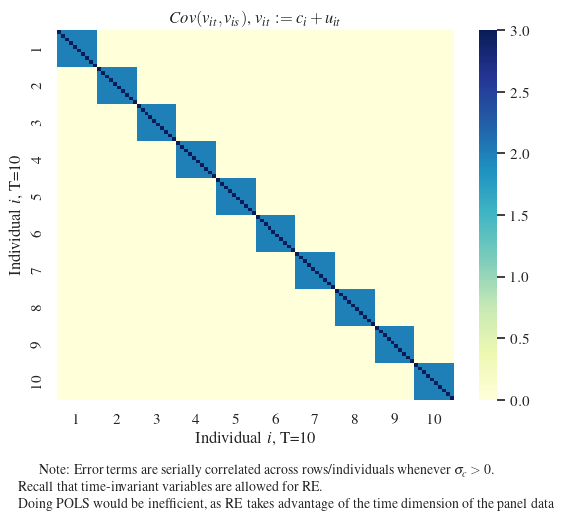

In [45]:
plot_omega(sigma_c=2., sigma_u=1., annotation=r'Error terms are serially correlated across rows/individuals whenever $\sigma_c>0$.\\ Recall that time-invariant variables are allowed for RE. \\ Doing POLS would be inefficient, as RE takes advantage of the time dimension of the panel data', title=r'$Cov(v_{it}, v_{is})$, $v_{it}:=c_i+u_{it}$', savename='theoretical_cov_re.pdf', cbar=True)

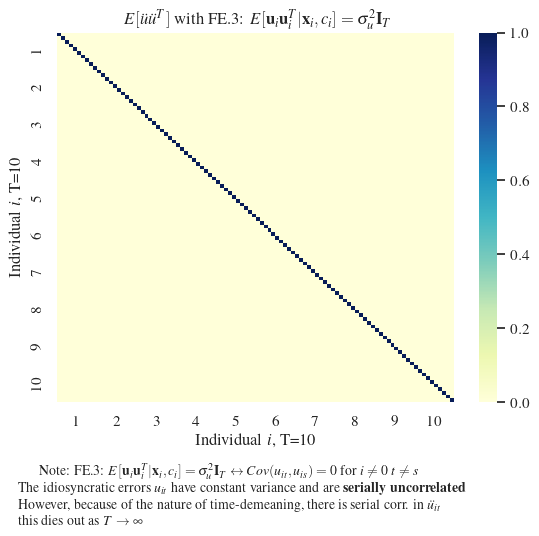

In [42]:
plot_omega(sigma_c=0., sigma_u=1., annotation=r'FE.3: $E[\mathbf{u}_i\mathbf{u}_i^T|\mathbf{x}_i, c_i]=\sigma^2_u \mathbf{I}_T \leftrightarrow Cov(u_{it}, u_{is})=0$ for $i\neq 0$  $t\neq s$ \\ The idiosyncratic errors $u_{it}$ have constant variance and are \textbf{serially uncorrelated and IID}\\However, because of the nature of time-demeaning, there is serial corr. in $\ddot{u}_{it}$ \\ this dies out as $T \rightarrow \infty$', title=r'$E[\ddot{u}\ddot{u}^T]$ with FE.3: $E[\mathbf{u}_i\mathbf{u}_i^T|\mathbf{x}_i, c_i]=\sigma^2_u \mathbf{I}_T$', savename='theoretical_cov_iid.pdf')

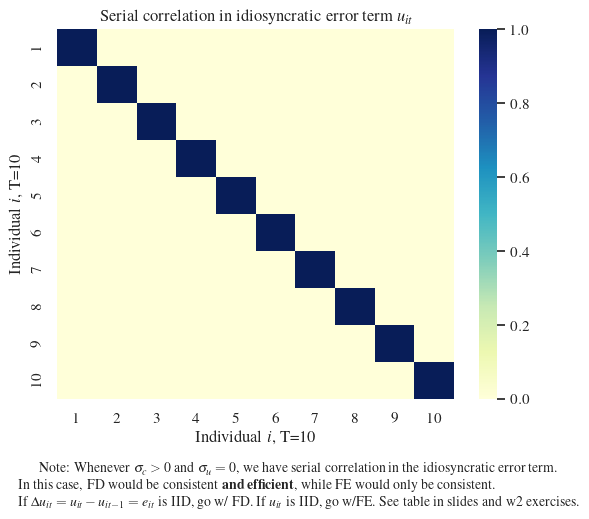

In [58]:
plot_omega(sigma_c=1., sigma_u=0., savename='theoretical_cov_fe.pdf',annotation=r'Whenever $\sigma_c>0$ and $\sigma_u=0$, we have serial correlation in the idiosyncratic error term. \\ In this case, FD would be consistent \textbf{and efficient}, while FE would only be consistent. \\ If $\Delta u_{it} = u_{it}-u_{it-1} = e_{it}$ is IID, go w/ FD. If $u_{it}$ is IID, go w/FE. See table in slides and w2 exercises.', title=r'Serial correlation in idiosyncratic error term $u_{it}$')

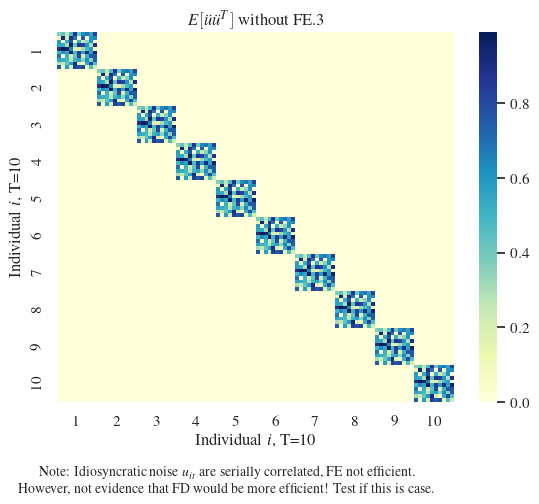

In [56]:
euu = np.random.uniform(0,1,(T,T))
plot_omega(sigma_c=0., sigma_u=1., savename='theoretical_cov_fe_robust.pdf', title=r'$E[\ddot{u}\ddot{u}^T]$ without FE.3', annotation=r'Idiosyncratic noise $u_{it}$ are serially correlated, FE not efficient. \\ However, not evidence that FD would be more efficient! Test if this is the case.', euu=euu)

# Simulate data

In [65]:
X = np.hstack([np.ones((N*T,1)), np.random.normal(0,1,(N*T,K-1))])
u = np.random.normal(0,sigma_u,(N*T,1))
c = np.random.normal(0,sigma_c,(N,1))
ii_repeat = [i for i in range(N) for t in range(T)]
c = c[ii_repeat]

y = X@beta + c + u

# induce correlation between c and x 
c = c + X[:, 1]
c = c - c.mean() # make mean-zero again 

In [66]:
betahat = np.linalg.inv(X.T @ X) @ X.T @ y

print(f'Estimate: ')
for k in range(K):
    print(f'{k}: {betahat[k,0]}')

Estimate: 
0: 0.32921133577926714
1: 1.0757665274299997
2: 1.170721660959492


This is clearly not anywhere near the true covariancematrix of the composite error terms.


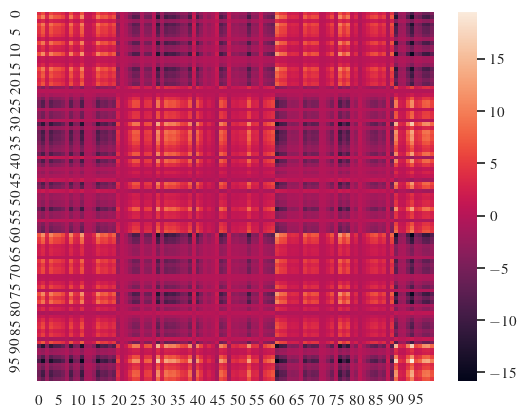

In [67]:
vhat = y - X@betahat
sns.heatmap(vhat @ vhat.T);